In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARMA

# Reading the Data

In [18]:
wb = pd.read_table('West_Bengal_SO2.txt',sep="\s")
od =  pd.read_table('Odisha_SO2.txt',sep="\s")
wb['Month'] = pd.to_datetime(wb.Month)
wb.set_index('Month', inplace=True)
od['Month'] = pd.to_datetime(od.Month)
od.set_index('Month', inplace=True)

# Info about the data

In [19]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2005-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SO2_monthly_mean       180 non-null    float64
 1   SO2_monthly_std        180 non-null    float64
 2   SO2_monthly_datapoint  180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB


In [20]:
od.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2005-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SO2_monthly_mean       180 non-null    float64
 1   SO2_monthly_std        180 non-null    float64
 2   SO2_monthly_datapoint  180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB


In [21]:
wb.isna().sum()

SO2_monthly_mean         0
SO2_monthly_std          0
SO2_monthly_datapoint    0
dtype: int64

In [22]:
od.isna().sum()

SO2_monthly_mean         0
SO2_monthly_std          0
SO2_monthly_datapoint    0
dtype: int64

# Monthly SO2 plots

Text(0, 0.5, 'Ammount')

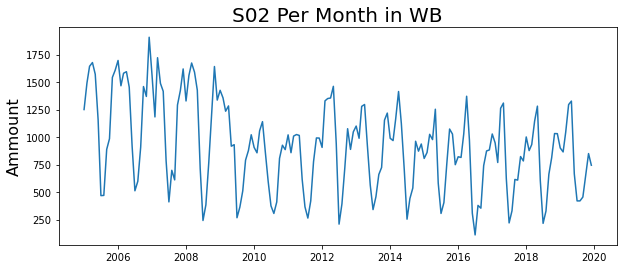

In [23]:
plt.figure(figsize=(10,4))
plt.plot(wb.SO2_monthly_datapoint)
plt.title('S02 Per Month in WB', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

Text(0, 0.5, 'Ammount')

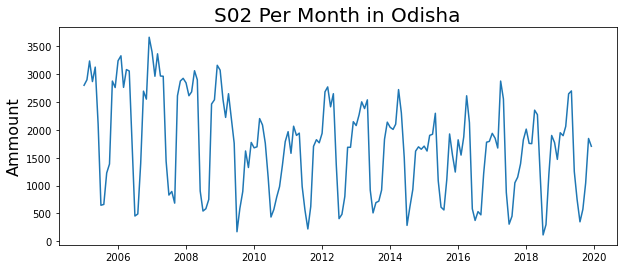

In [24]:
plt.figure(figsize=(10,4))
plt.plot(od.SO2_monthly_datapoint)
plt.title('S02 Per Month in Odisha', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

# Data Preprocessing

In [25]:
wb_df = wb.copy()
od_df = od.copy()

In [26]:
wb_df = wb_df.asfreq(pd.infer_freq(wb_df.index))
od_df = od_df.asfreq(pd.infer_freq(od_df.index))

In [27]:
wb_series = wb_df.SO2_monthly_datapoint
od_series = od_df.SO2_monthly_datapoint
#od_series
#wb_series

In [28]:
# Normalize

In [29]:
avg_wb, dev_wb = wb_series.mean(), wb_series.std()
avg_od, dev_od = od_series.mean(), od_series.std()

In [30]:
wb_2 = wb_series.copy()
od_2 = od_series.copy()

In [31]:
wb_2 = (wb_2 - avg_wb) / dev_wb
od_2 = (od_2 - avg_od) / dev_od

Text(0, 0.5, 'Ammount')

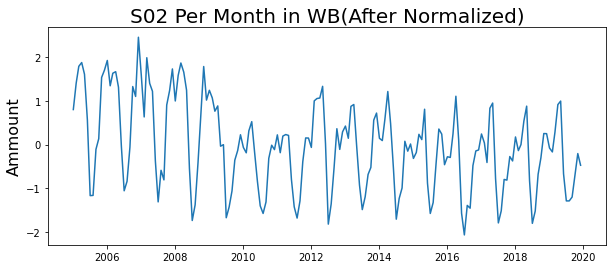

In [32]:
plt.figure(figsize=(10,4))
plt.plot(wb_2)
plt.title('S02 Per Month in WB(After Normalized)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

Text(0, 0.5, 'Ammount')

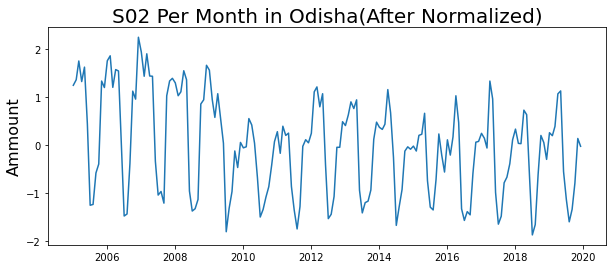

In [33]:
plt.figure(figsize=(10,4))
plt.plot(od_2)
plt.title('S02 Per Month in Odisha(After Normalized)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

In [34]:
# There is some trend
# Taking First Difference to Remove Trend

In [35]:
wb_2 = wb_2.diff().dropna()
od_2 = od_2.diff().dropna()

Text(0, 0.5, 'Ammount')

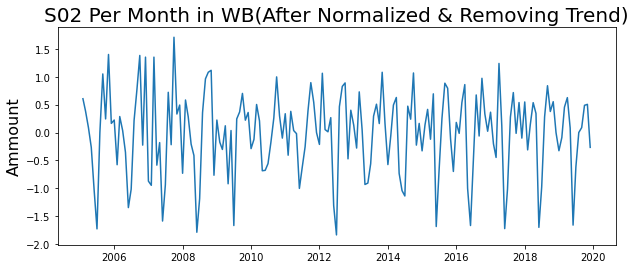

In [36]:
plt.figure(figsize=(10,4))
plt.plot(wb_2)
plt.title('S02 Per Month in WB(After Normalized & Removing Trend)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

Text(0, 0.5, 'Ammount')

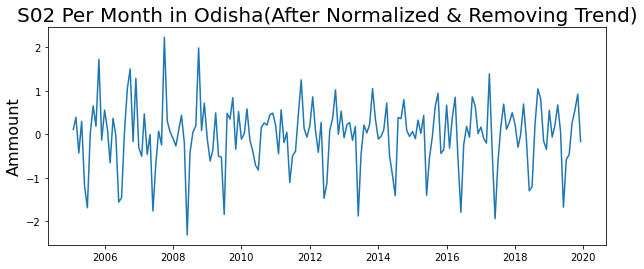

In [37]:
plt.figure(figsize=(10,4))
plt.plot(od_2)
plt.title('S02 Per Month in Odisha(After Normalized & Removing Trend)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

In [38]:
################################################################################################################################

In [39]:
data_orig = wb_series.copy()

Month
2005-02-01   NaN
2005-03-01   NaN
2005-04-01   NaN
2005-05-01   NaN
2005-06-01   NaN
              ..
2019-08-01   NaN
2019-09-01   NaN
2019-10-01   NaN
2019-11-01   NaN
2019-12-01   NaN
Freq: MS, Name: resid, Length: 179, dtype: float64


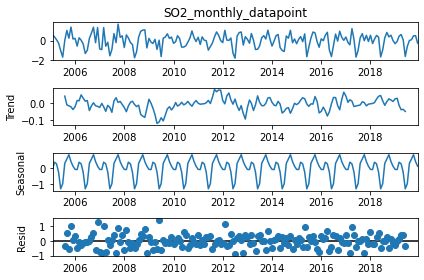

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = wb_2.copy()

decompose_res = seasonal_decompose(analysis,model= 'additive')
decompose_res.plot()

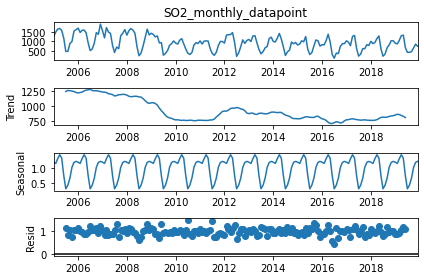

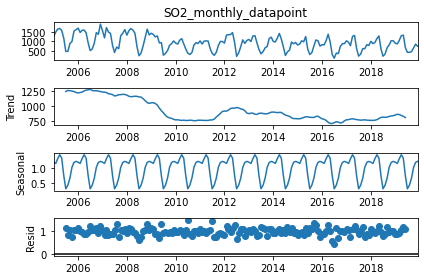

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

#data_orig.set_index('Month', inplace=True)

analysis = data_orig.copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

In [ ]:
################################################################################################################################

In [72]:
# Remove Increasing Volatility

In [29]:
annual_volatility_wb = wb_2.groupby(wb_2.index.year).std()
annual_volatility_od = od_2.groupby(od_2.index.year).std()

In [30]:
#annual_volatility_wb
#annual_volatility_od

In [31]:
wb_annual_vol = wb_2.index.map(lambda d: annual_volatility_wb.loc[d.year])
od_annual_vol = od_2.index.map(lambda d: annual_volatility_od.loc[d.year])

In [32]:
#od_annual_vol
#wb_annual_vol

In [33]:
wb_2 = wb_2 / wb_annual_vol
od_2 = od_2 / od_annual_vol

Text(0, 0.5, 'Ammount')

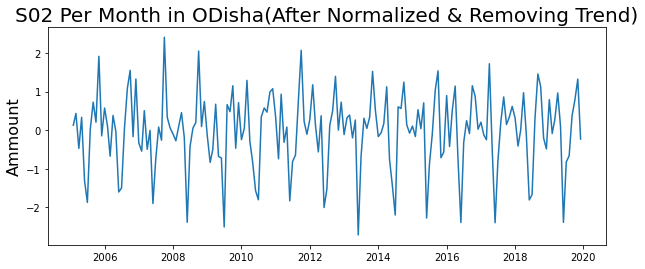

In [34]:
plt.figure(figsize=(10,4))
plt.plot(od_2)
plt.title('S02 Per Month in ODisha(After Normalized & Removing Trend)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

Text(0, 0.5, 'Ammount')

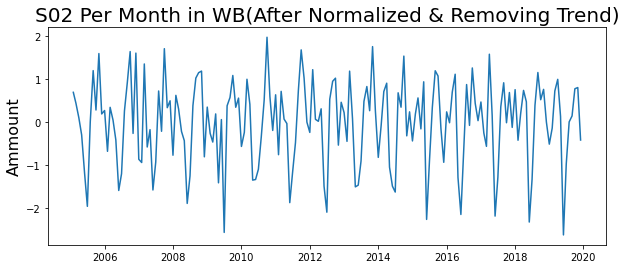

In [35]:
plt.figure(figsize=(10,4))
plt.plot(wb_2)
plt.title('S02 Per Month in WB(After Normalized & Removing Trend)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

In [36]:
# Remove Seasonality

In [37]:
wb_avgs = wb_2.groupby(wb_2.index.month).mean()
od_avgs = od_2.groupby(od_2.index.month).mean()

In [38]:
wb_month_avg = wb_2.index.map(lambda d: wb_avgs.loc[d.month])
od_month_avg = od_2.index.map(lambda d: od_avgs.loc[d.month])


In [39]:
wb_f = wb_2 - wb_month_avg
od_f = od_2 - od_month_avg

Text(0, 0.5, 'Ammount')

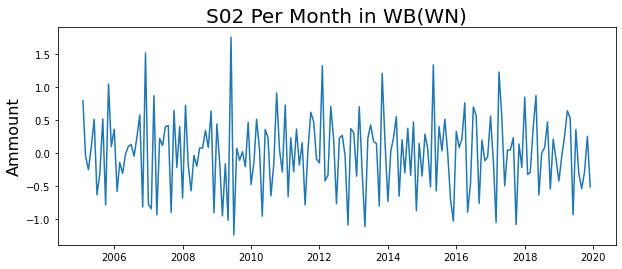

In [40]:
plt.figure(figsize=(10,4))
plt.plot(wb_f)
plt.title('S02 Per Month in WB(WN)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

Text(0, 0.5, 'Ammount')

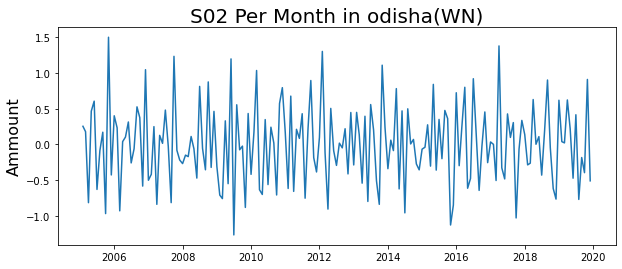

In [41]:
plt.figure(figsize=(10,4))
plt.plot(od_f)
plt.title('S02 Per Month in odisha(WN)', fontsize=20)
plt.ylabel('Ammount', fontsize=16)

# ADF Testing

In [46]:
# Perform Augmented Dickey-Fuller test on wb_f:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(wb_f, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -11.13465488827494
p-value: 3.2177666555669357e-20
Critial Values:
   1%, -3.4680615871598537
Critial Values:
   5%, -2.8781061899535128
Critial Values:
   10%, -2.5756015922004134


In [47]:
# Stationary

In [48]:
# Perform Augmented Dickey-Fuller test on od_f:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(od_f, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.826026203055402
p-value: 6.478423235634272e-12
Critial Values:
   1%, -3.4691814633722453
Critial Values:
   5%, -2.878595143532943
Critial Values:
   10%, -2.5758625549741803


In [49]:
# Stationary

# ACF & PACF Plots and Cheaking AIC value

In [50]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

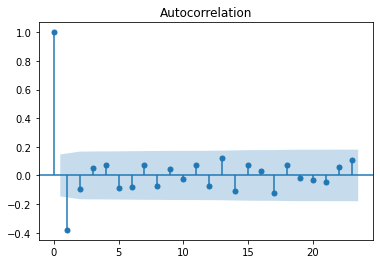

In [51]:
acf_plot_wb = plot_acf(wb_f)

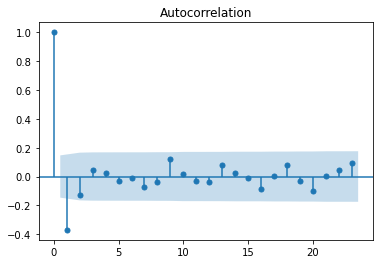

In [52]:
acf_plot_od = plot_acf(od_f)

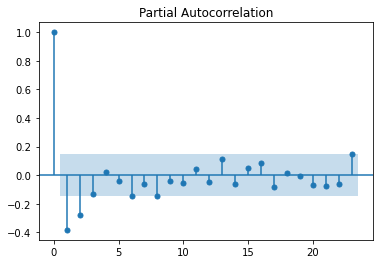

In [53]:
pacf_plot_wb = plot_pacf(wb_f)

In [62]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(od_f,order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:297.11419884442444
ARMA(0, 1) - AIC:248.43323289791834
ARMA(0, 2) - AIC:247.0588778807092
ARMA(0, 3) - AIC:249.03406219493417
ARMA(1, 0) - AIC:272.72129635369237
ARMA(1, 1) - AIC:247.23581589671375
ARMA(1, 2) - AIC:249.01318313389044
ARMA(1, 3) - AIC:250.99244477468562
ARMA(2, 0) - AIC:257.46035192513125
ARMA(2, 1) - AIC:249.15690605385993
ARMA(2, 2) - AIC:250.17912580415674
ARMA(2, 3) - AIC:255.12357290770376
ARMA(3, 0) - AIC:254.97522228488754
ARMA(3, 1) - AIC:250.4375397240733
ARMA(3, 2) - AIC:252.43438302979507
ARMA(3, 3) - AIC:251.80359632535306


In [55]:
# Lowest at (0,3)

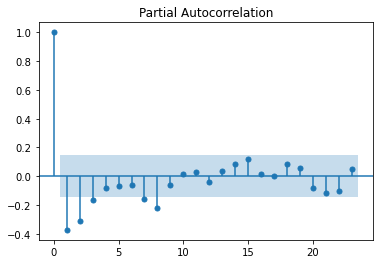

In [56]:
pacf_plot_od = plot_pacf(od_f)

In [60]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(wb_f,order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:307.61620544098196
ARMA(0, 1) - AIC:263.66135072808913
ARMA(0, 2) - AIC:264.27056462062194
ARMA(0, 3) - AIC:266.2659825224524
ARMA(1, 0) - AIC:281.3032531302923
ARMA(1, 1) - AIC:264.19447994205296
ARMA(1, 2) - AIC:263.1803754892271
ARMA(1, 3) - AIC:268.2650299273322
ARMA(2, 0) - AIC:268.62965954866814
ARMA(2, 1) - AIC:266.07994343551354
ARMA(2, 2) - AIC:264.91020524905156
ARMA(2, 3) - AIC:267.8938931464033
ARMA(3, 0) - AIC:267.488740370716
ARMA(3, 1) - AIC:266.04920980160045
ARMA(3, 2) - AIC:268.9669135948859
ARMA(3, 3) - AIC:267.06733393228575


In [58]:
# Lowest = (0,1)

In [59]:
from statsmodels.tsa.arima_model import ARMA

In [63]:
model_wb = ARMA(wb_f, order=(0,1))
model_od = ARMA(od_f, order=(0,3))

In [64]:
model_fit_wb = model_wb.fit()
model_fit_od = model_od.fit()

In [65]:
prediction_wb = model_fit_wb.forecast(10)
prediction_od = model_fit_od.forecast(10)

In [66]:
predictions = prediction_wb[0]
lower_bound = prediction_wb[2][:,0]
upper_bound = prediction_wb[2][:,1]

In [67]:
predictions1 = prediction_od[0]
lower_bound1 = prediction_od[2][:,0]
upper_bound1 = prediction_od[2][:,1]

In [222]:
predictions

array([178.30819213,   2.37268191,   2.37268191,   2.37268191,
         2.37268191,   2.37268191,   2.37268191,   2.37268191,
         2.37268191,   2.37268191])

In [223]:
predictions1

array([ 0.12981912,  0.05711388, -0.00345599,  0.00032293,  0.00032293,
        0.00032293,  0.00032293,  0.00032293,  0.00032293,  0.00032293])

 P : Predicted 
 L: Lower bound 
 U: Upper Bound


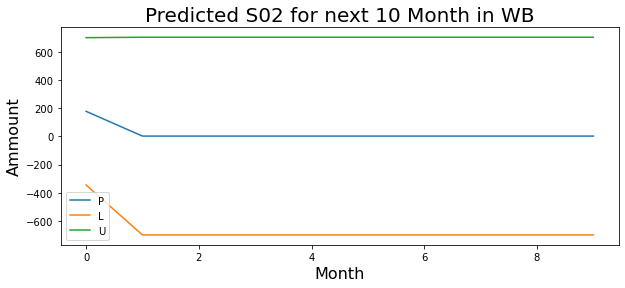

In [224]:
plt.figure(figsize=(10,4))
plt.plot(predictions)
plt.plot(lower_bound)
plt.plot(upper_bound)
plt.title('Predicted S02 for next 10 Month in WB', fontsize=20)
plt.ylabel('Ammount', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.legend("PLU")
print(" P : Predicted \n L: Lower bound \n U: Upper Bound")

 P : Predicted 
 L: Lower bound 
 U: Upper Bound


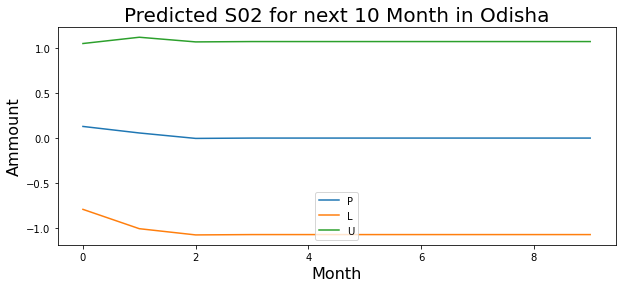

In [225]:
plt.figure(figsize=(10,4))
plt.plot(predictions1)
plt.plot(lower_bound1)
plt.plot(upper_bound1)
plt.title('Predicted S02 for next 10 Month in Odisha', fontsize=20)
plt.ylabel('Ammount', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.legend("PLU")
print(" P : Predicted \n L: Lower bound \n U: Upper Bound")

In [226]:
#2nd Model


In [228]:
model_wb2 = ARMA(wb_f, order=(0,2))
model_od2 = ARMA(od_f, order=(1,1))

In [229]:
model_fit_wb_2 = model_wb2.fit()
model_fit_od_2 = model_od2.fit()

In [230]:
prediction_wb2 = model_fit_wb_2.forecast(10)
prediction_od2 = model_fit_od_2.forecast(10)

In [231]:
predictions2 = prediction_wb2[0]
lower_bound2 = prediction_wb2[2][:,0]
upper_bound2 = prediction_wb2[2][:,1]

In [232]:
predictions3 = prediction_od2[0]
lower_bound3 = prediction_od2[2][:,0]
upper_bound3 = prediction_od2[2][:,1]

 P : Predicted 
 L: Lower bound 
 U: Upper Bound


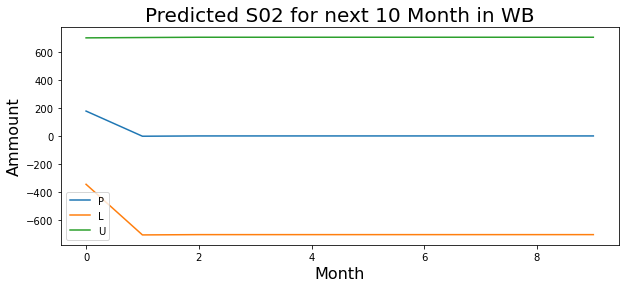

In [233]:
plt.figure(figsize=(10,4))
plt.plot(predictions2)
plt.plot(lower_bound2)
plt.plot(upper_bound2)
plt.title('Predicted S02 for next 10 Month in WB', fontsize=20)
plt.ylabel('Ammount', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.legend("PLU")
print(" P : Predicted \n L: Lower bound \n U: Upper Bound")

 P : Predicted 
 L: Lower bound 
 U: Upper Bound


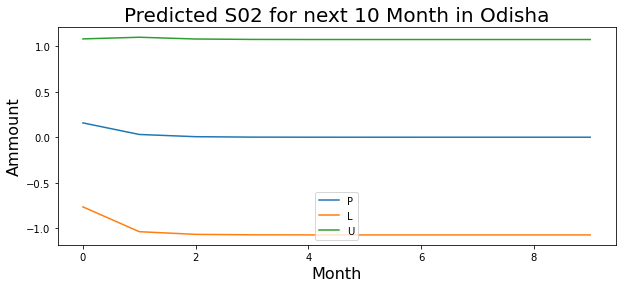

In [234]:
plt.figure(figsize=(10,4))
plt.plot(predictions3)
plt.plot(lower_bound3)
plt.plot(upper_bound3)
plt.title('Predicted S02 for next 10 Month in Odisha', fontsize=20)
plt.ylabel('Ammount', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.legend("PLU")
print(" P : Predicted \n L: Lower bound \n U: Upper Bound")